In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img

In [2]:
dataset_path = '/kaggle/input/utkface-new/crop_part1'

# Function to load and preprocess images
def load_images_and_labels(dataset_path):
    images = []
    image_names = []
    ages = []
    dim1=[]
    dim2=[]
    
    for filename in os.listdir(dataset_path):
        if filename.endswith('.jpg'):
            # Extract the age from the filename (format: age_gender_race.jpg)
            age = int(filename.split('_')[0])
            image_name = filename  # You can store the entire filename as image_name
            img = cv2.imread(os.path.join(dataset_path, filename))
            img = cv2.resize(img, (200, 200))
            d1,d2,colors = img.shape
            dim1.append(d1)
            dim2.append(d2)
            images.append(img)
            image_names.append(image_name)
            ages.append(age)
    
    return np.array(images), np.array(image_names), np.array(ages), dim1, dim2

In [3]:
# Load data
images, image_names, ages, dim1, dim2 = load_images_and_labels(dataset_path)

# Convert image_names and ages into a DataFrame
df = pd.DataFrame({
    'image_names': image_names,
    'ages': ages
})

# Display the DataFrame
print(df)

                                image_names  ages
0     26_0_2_20170104023102422.jpg.chip.jpg    26
1     21_1_3_20170105003215901.jpg.chip.jpg    21
2     17_1_4_20170103222931966.jpg.chip.jpg    17
3     76_0_0_20170104213515132.jpg.chip.jpg    76
4     18_1_0_20170104022856102.jpg.chip.jpg    18
...                                     ...   ...
9775  26_1_0_20170111182452795.jpg.chip.jpg    26
9776  66_0_0_20170104002319293.jpg.chip.jpg    66
9777  41_0_0_20170109012220690.jpg.chip.jpg    41
9778   2_0_2_20161219221701671.jpg.chip.jpg     2
9779  65_1_0_20170110182002744.jpg.chip.jpg    65

[9780 rows x 2 columns]


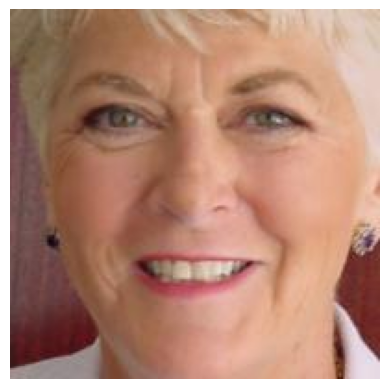

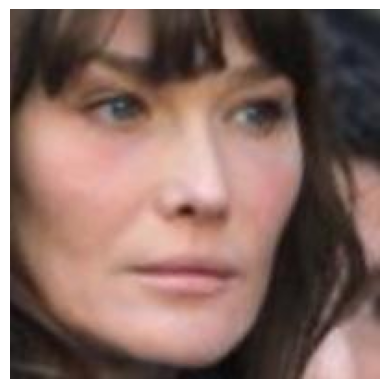

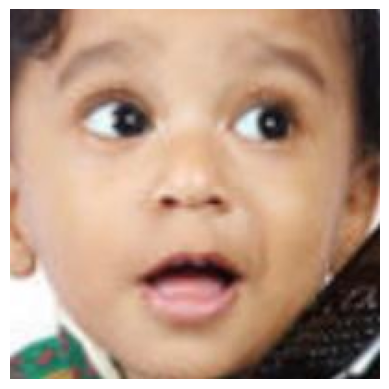

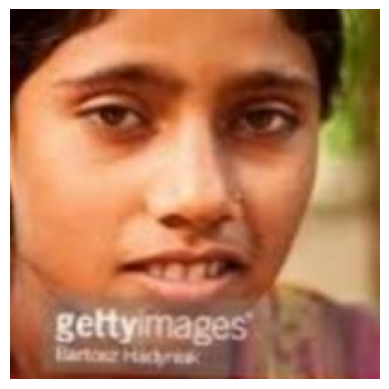

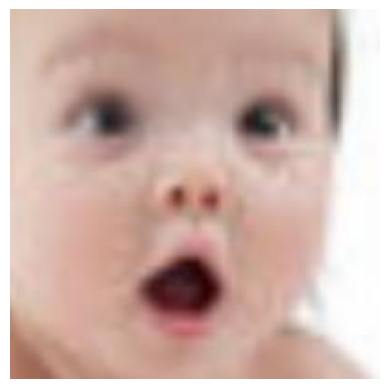

In [5]:
for i in range(10, 15):
    img = Image.open("/kaggle/input/utkface-new/crop_part1/" + df.image_names[i])
    plt.imshow(img)
    plt.axis('off')  # Optionally turn off the axis
    plt.show() 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ages', ylabel='Count'>

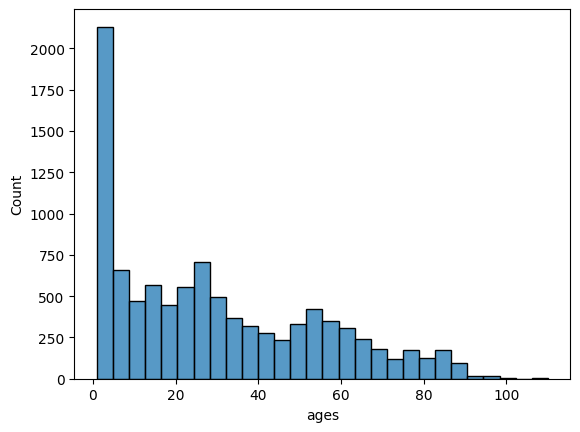

In [6]:
sns.histplot(df['ages'])

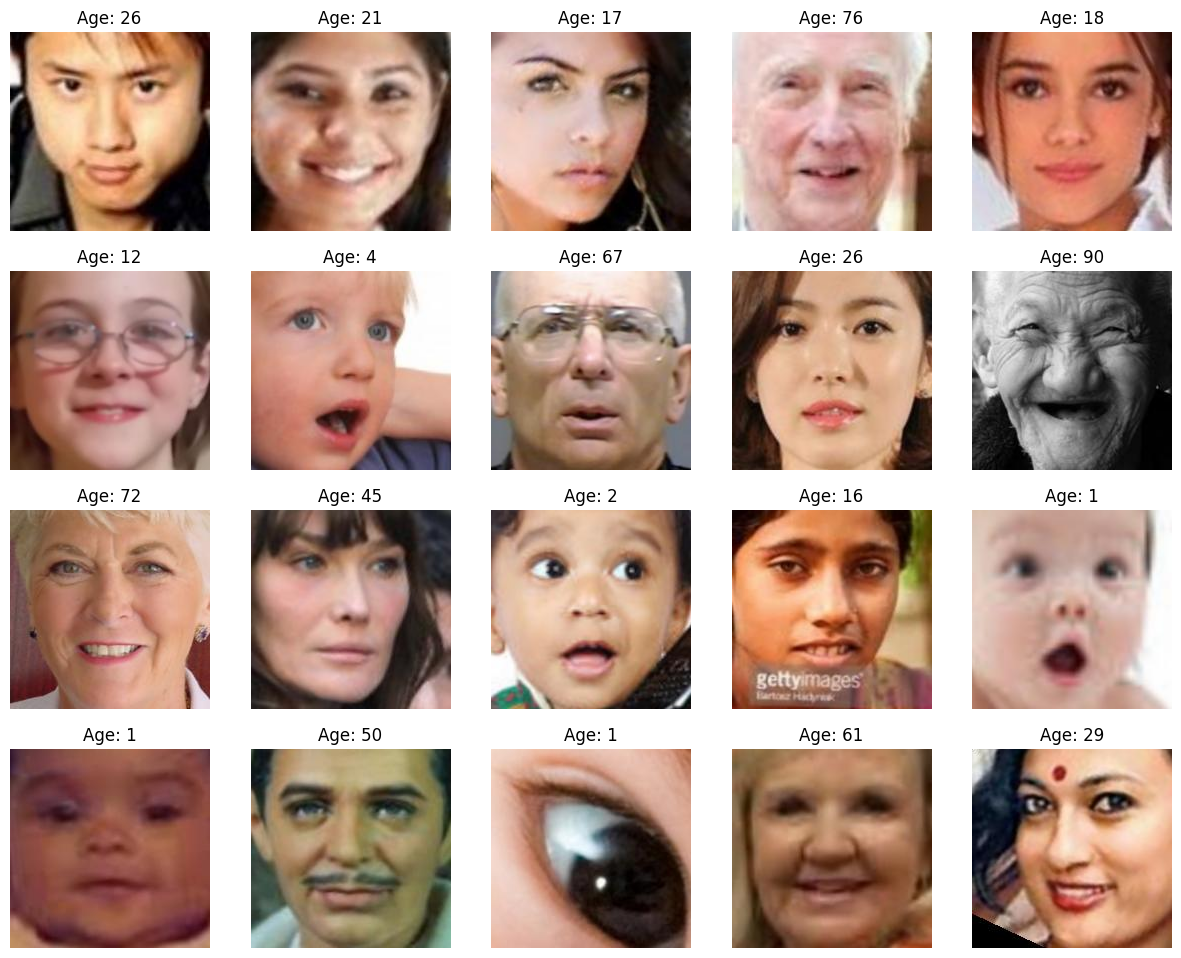

In [7]:
files = df.iloc[0:20]
plt.figure(figsize=(15,15))
for index, file, age in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img("/kaggle/input/utkface-new/crop_part1/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age}")
    plt.axis('off')

In [8]:
len(images)

9780

In [4]:
np.mean(dim1)

200.0

In [5]:
np.mean(dim2)

200.0

In [2]:
image_shape=(200,200,3)

In [7]:
age_image = "/kaggle/input/utkface-new/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg"

In [8]:
age_img = imread(age_image)

In [9]:
age_img.max()

255

In [9]:
for name in list(globals().keys()):
    if name[0] != '_':
        del globals()[name]

In [2]:
dataset_path = '/kaggle/input/utkface-new/crop_part1'

# Function to load and preprocess images
def load_images_and_labels(dataset_path):
    images = []
    ages = []
    
    for filename in os.listdir(dataset_path):
        if filename.endswith('.jpg'):
            # Extract the age from the filename (format: age_gender_race.jpg)
            age = int(filename.split('_')[0])
            image_name = filename  # You can store the entire filename as image_name
            img = cv2.imread(os.path.join(dataset_path, filename))
            img = cv2.resize(img, (200, 200))
            images.append(img)
            ages.append(age)
    
    return np.array(images), np.array(ages)

In [3]:
images, ages = load_images_and_labels(dataset_path)

In [4]:
images = images / 255.0

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, ages, test_size=0.2, random_state=101)

In [7]:
del images
del ages
import gc
gc.collect()

0

In [20]:
len(X_train)

7824

In [12]:
len(y_train)

7824

In [21]:
len(X_test)

1956

In [14]:
len(y_test)

1956

In [6]:
X_train.shape

(7824, 200, 200, 3)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, InputLayer

model = Sequential()

# Input layer
model.add(InputLayer(shape=image_shape))

# Convolutional layers and pooling
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 196, 196, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 96, 96, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 94, 94, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 43, 43, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 19, 19, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 17, 17, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,616,321 (82.46 MB)

 Trainable params: 21,616,321 (82.46 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stop])

Epoch 1/50


I0000 00:00:1726674948.645429     110 service.cc:145] XLA service 0x796b640016c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726674948.645527     110 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726674948.645535     110 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1726674984.534993     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


196/196 ━━━━━━━━━━━━━━━━━━━━ 117s 396ms/step - loss: 1847.2810 - mae: 28.0388 - val_loss: 788.7059 - val_mae: 21.0069
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 200ms/step - loss: 694.4224 - mae: 21.0572 - val_loss: 558.1251 - val_mae: 18.1911
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 199ms/step - loss: 589.1901 - mae: 18.5564 - val_loss: 430.0449 - val_mae: 14.6383
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 199ms/step - loss: 412.8576 - mae: 14.9293 - val_loss: 458.5934 - val_mae: 14.6651
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - loss: 363.4181 - mae: 13.6925 - val_loss: 225.4119 - val_mae: 10.4415
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 199ms/step - loss: 300.6324 - mae: 12.2101 - val_loss: 240.5549 - val_mae: 10.6918
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 198ms/step - loss: 255.8449 - mae: 11.1221 - val_loss: 169.4622 - val_mae: 8.8705
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 198ms/step - loss: 228.6893 - mae: 10.6397 - val_loss: 165.3601 - val_mae: 8.

In [18]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')

62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 147.8390 - mae: 8.1475
Test MAE: 8.133058547973633


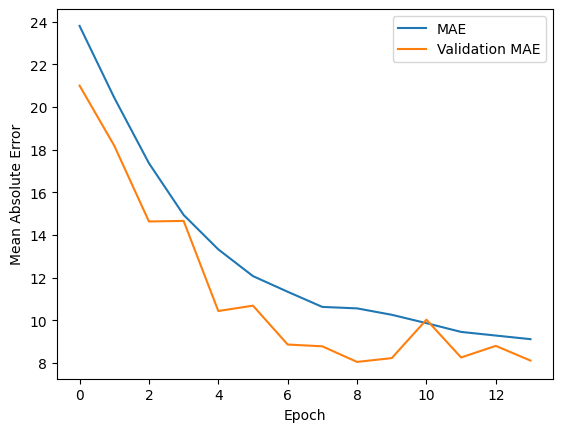

In [19]:
plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [11]:
# Function to load and preprocess image
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (200, 200))
    img = img/255.0
    return np.array(img)

In [16]:
image = load_and_preprocess_image('/kaggle/input/utkface-new/UTKFace/10_0_0_20170103200329407.jpg.chip.jpg')

In [17]:
image.shape

(200, 200, 3)

In [18]:
image = image.reshape(1,200,200,3)

In [19]:
image.shape

(1, 200, 200, 3)

In [35]:
model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[5.080643]], dtype=float32)

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# Load the VGG16 model pre-trained on ImageNet
vgg = VGG16(weights='imagenet', include_top=False, input_shape=image_shape)

# Freeze the layers in the pre-trained model
for layer in vgg.layers:
    layer.trainable = False

# Add custom layers for age prediction
x = Flatten()(vgg.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='linear')(x)

# Create the model
vgg_model = Model(vgg.input, output)

# Compile the model
vgg_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history_vgg = vgg_model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32)


Epoch 1/20


I0000 00:00:1726676705.776258     592 service.cc:145] XLA service 0x7a23c4003b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726676705.776862     592 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726676705.776869     592 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/196 ━━━━━━━━━━━━━━━━━━━━ 53:32 16s/step - loss: 1140.1235 - mae: 26.0844

I0000 00:00:1726676720.252996     592 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


196/196 ━━━━━━━━━━━━━━━━━━━━ 67s 261ms/step - loss: 397.4607 - mae: 15.0987 - val_loss: 161.6858 - val_mae: 9.3305
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 145ms/step - loss: 175.7243 - mae: 9.8384 - val_loss: 137.9488 - val_mae: 8.7696
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - loss: 153.6135 - mae: 9.1187 - val_loss: 124.8348 - val_mae: 7.9898
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - loss: 136.7537 - mae: 8.4324 - val_loss: 126.1406 - val_mae: 8.0237
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 142ms/step - loss: 127.4471 - mae: 8.1532 - val_loss: 117.3886 - val_mae: 7.6615
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 141ms/step - loss: 116.9706 - mae: 7.7922 - val_loss: 119.8893 - val_mae: 7.7631
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 141ms/step - loss: 116.4388 - mae: 7.7187 - val_loss: 133.6205 - val_mae: 8.4791
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 141ms/step - loss: 108.7657 - mae: 7.5431 - val_loss: 117.0278 - val_mae: 7.7391
Epoch 9/20

In [12]:
# Evaluate the model
vgg_test_loss, vgg_test_mae = vgg_model.evaluate(X_test, y_test)
print(f'VGG16 Transfer Learning MAE: {vgg_test_mae}')

62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - loss: 108.0044 - mae: 7.1536
VGG16 Transfer Learning MAE: 7.123572826385498


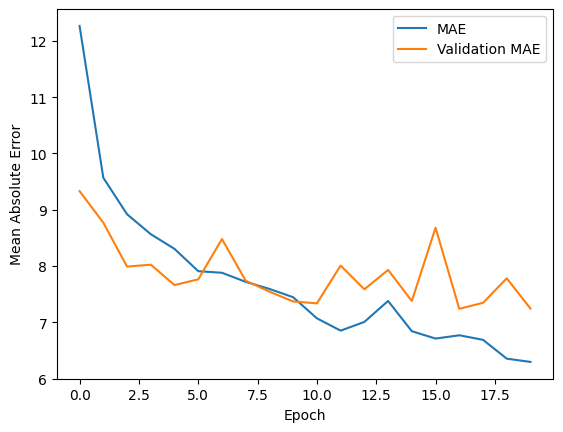

In [13]:
plt.plot(history_vgg.history['mae'], label='MAE')
plt.plot(history_vgg.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [24]:
image = load_and_preprocess_image('/kaggle/input/utkface-new/UTKFace/105_1_0_20170112213507183.jpg.chip.jpg')

In [25]:
image = image.reshape(1,200,200,3)

In [26]:
vgg_model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[84.779755]], dtype=float32)

In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten,Dense, Dropout
from tensorflow.keras.models import Model

# Load the ResNet50 model pre-trained on ImageNet
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(200,200,3))

# Freeze the layers in the pre-trained model
for layer in resnet.layers:
    layer.trainable = False

# Add custom layers for age prediction
x = Flatten()(resnet.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='linear')(x)

# Create the model
resnet_model = Model(resnet.input, output)

# Compile the model
resnet_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history_resnet = resnet_model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=32)


Epoch 1/30


I0000 00:00:1726744737.534491    2973 service.cc:145] XLA service 0x7f5448003c00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726744737.536540    2973 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726744737.536551    2973 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/196 ━━━━━━━━━━━━━━━━━━━━ 53:20 16s/step - loss: 1353.7448 - mae: 29.5812

I0000 00:00:1726744746.458256    2973 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


196/196 ━━━━━━━━━━━━━━━━━━━━ 48s 162ms/step - loss: 766.3262 - mae: 22.4458 - val_loss: 755.6081 - val_mae: 20.6095
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - loss: 732.0057 - mae: 21.8873 - val_loss: 574.1689 - val_mae: 19.0959
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - loss: 660.0511 - mae: 20.6189 - val_loss: 533.5191 - val_mae: 20.2582
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - loss: 632.0442 - mae: 20.1310 - val_loss: 511.9774 - val_mae: 17.3419
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - loss: 566.7344 - mae: 18.9612 - val_loss: 428.7972 - val_mae: 17.7530
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - loss: 526.5565 - mae: 17.9216 - val_loss: 406.5097 - val_mae: 17.3021
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - loss: 567.0314 - mae: 18.7072 - val_loss: 392.7300 - val_mae: 16.4464
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - loss: 522.7242 - mae: 17.7264 - val_loss: 439.2704 - val_mae: 15.3090
Ep

In [7]:
# Evaluate the model
resnet_test_loss, resnet_test_mae = resnet_model.evaluate(X_test, y_test)
print(f'ResNet50 Transfer Learning MAE: {resnet_test_mae}')


62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 287.2661 - mae: 12.4458
ResNet50 Transfer Learning MAE: 12.668303489685059


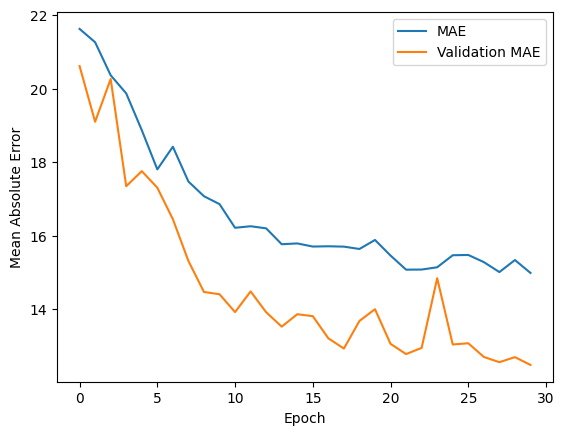

In [8]:
plt.plot(history_resnet.history['mae'], label='MAE')
plt.plot(history_resnet.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [15]:
image = load_and_preprocess_image('/kaggle/input/utkface-new/UTKFace/10_0_0_20170103200329407.jpg.chip.jpg')

In [16]:
image = image.reshape(1,200,200,3)

In [17]:
resnet_model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[12.929513]], dtype=float32)

**DenseNet**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the model
def build_densenet(input_shape, num_classes):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dense(num_classes)  # Use 'linear' if predicting continuous age
    ])
    return model

# Parameters
input_shape = (200, 200, 3)
num_classes = 1  # Assuming regression task for age prediction

# Instantiate and compile model
model = build_densenet(input_shape, num_classes)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


In [1]:
# Evaluate the model
dense_net_test_loss, resnet_test_mae = model.evaluate(X_test, y_test)
print(f'DenseNet  MAE: {dense_net_test_loss}')


NameError: name 'model' is not defined

In [ ]:
plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

**EfficientNet**

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define the model
def build_efficientnet(input_shape, num_classes):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(num_classes, activation='linear')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Parameters
input_shape = (200, 200, 3)
num_classes = 1

# Instantiate and compile model
model = build_efficientnet(input_shape, num_classes)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Inception-v3**

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define the model
def build_inceptionv3(input_shape, num_classes):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(num_classes, activation='linear')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Parameters
input_shape = (200, 200, 3)
num_classes = 1

# Instantiate and compile model
model = build_inceptionv3(input_shape, num_classes)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


**MobileNet**

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define the model
def build_mobilenet(input_shape, num_classes):
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(num_classes, activation='linear')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Parameters
input_shape = (200, 200, 3)
num_classes = 1

# Instantiate and compile model
model = build_mobilenet(input_shape, num_classes)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

/tmp/ipykernel_151/2773707579.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
